In [1]:
import pandas as pd

In [2]:
# Charger les données du fichier pour l'exploration initiale
file_path = 'dataset/ecommerce_sample.csv'
data = pd.read_csv(file_path)

# Afficher les premières lignes pour comprendre la structure des données
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [3]:
# Extraire la première branche de chaque catégorie dans "product_category_tree" comme nouvelle colonne "main_category"
data['main_category'] = data['product_category_tree'].apply(lambda x: eval(x)[0].split(' >> ')[0] if pd.notna(x) else None)

# Afficher un aperçu des données avec la colonne "main_category"
data[['description', 'main_category']].head()

,description,main_category
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing


In [4]:
import re
from nltk.corpus import stopwords

# Télécharger les stopwords pour NLTK si nécessaire
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Fonction de prétraitement des descriptions
def preprocess_description(text):
    # Convertir en minuscules
    text = text.lower()
    # Supprimer la ponctuation et les caractères spéciaux
    text = re.sub(r'[^\w\s]', '', text)
    # Supprimer les stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Appliquer le prétraitement à la colonne 'description'
data['cleaned_description'] = data['description'].apply(lambda x: preprocess_description(x) if pd.notna(x) else '')

# Afficher un aperçu des descriptions nettoyées
data[['description', 'cleaned_description', 'main_category']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\antoi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,description,cleaned_description,main_category
0,Key Features of Elegance Polyester Multicolor ...,key features elegance polyester multicolor abs...,Home Furnishing
1,Specifications of Sathiyas Cotton Bath Towel (...,specifications sathiyas cotton bath towel 3 ba...,Baby Care
2,Key Features of Eurospa Cotton Terry Face Towe...,key features eurospa cotton terry face towel s...,Baby Care
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,key features santosh royal fashion cotton prin...,Home Furnishing
4,Key Features of Jaipur Print Cotton Floral Kin...,key features jaipur print cotton floral king s...,Home Furnishing


In [5]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch

# Charger le tokenizer et le modèle DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Limiter les séquences à une longueur de 200 tokens
MAX_LEN = 200

# Fonction pour obtenir les embeddings BERT des descriptions
def get_embeddings(text):
    # Tokenizer avec padding et troncature pour respecter la longueur maximale
    inputs = tokenizer(text, padding='max_length', truncation=True, max_length=MAX_LEN, return_tensors="pt")
    # Obtenir les embeddings de la sortie du modèle
    with torch.no_grad():
        outputs = model(**inputs)
    # Prendre la moyenne des embeddings des tokens (option simplifiée pour représentation)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.squeeze().numpy()

# Appliquer la fonction pour obtenir les embeddings sur les descriptions nettoyées
data['embeddings'] = data['cleaned_description'].apply(lambda x: get_embeddings(x))

# Afficher les premiers embeddings pour confirmation
data[['cleaned_description', 'embeddings', 'main_category']].head()


c:\Users\antoi\Documents\Projets\multi_input\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\antoi\Documents\Projets\multi_input\venv\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\antoi\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrat

,cleaned_description,embeddings,main_category
0,key features elegance polyester multicolor abs...,"[-0.13508546, 0.07364818, 0.6608772, -0.105381...",Home Furnishing
1,specifications sathiyas cotton bath towel 3 ba...,"[-0.06125532, -0.035430335, 0.3650735, 0.03336...",Baby Care
2,key features eurospa cotton terry face towel s...,"[-0.1642514, 0.02585379, 0.34148327, -0.037365...",Baby Care
3,key features santosh royal fashion cotton prin...,"[0.015694514, 0.049962863, 0.40629467, -0.0912...",Home Furnishing
4,key features jaipur print cotton floral king s...,"[-0.058660522, 0.09750238, 0.43733457, -0.1031...",Home Furnishing


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Préparation des données d'entrée (embeddings)
X = np.vstack(data['embeddings'].values)  # Convertir la liste d'embeddings en matrice
y = data['main_category']

# Encodage des labels en valeurs entières
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convertit les catégories en entiers

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Entraînement du modèle de classification
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1964 - loss: 1.9190 - val_accuracy: 0.4583 - val_loss: 1.6654
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4670 - loss: 1.5989 - val_accuracy: 0.6488 - val_loss: 1.0867
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6568 - loss: 1.0630 - val_accuracy: 0.7679 - val_loss: 0.6549
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7276 - loss: 0.7558 - val_accuracy: 0.8512 - val_loss: 0.4992
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8147 - loss: 0.5724 - val_accuracy: 0.8571 - val_loss: 0.4428
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8517 - loss: 0.4807 - val_accuracy: 0.8512 - val_loss: 0.4248
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8811 - loss: 0.4027 - val_accuracy: 0.8988 - val_loss: 0.3657
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9112 - loss: 0.3207 - val_accuracy: 0.8929 - val_loss

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8838 - loss: 0.3600
Test Accuracy: 0.88


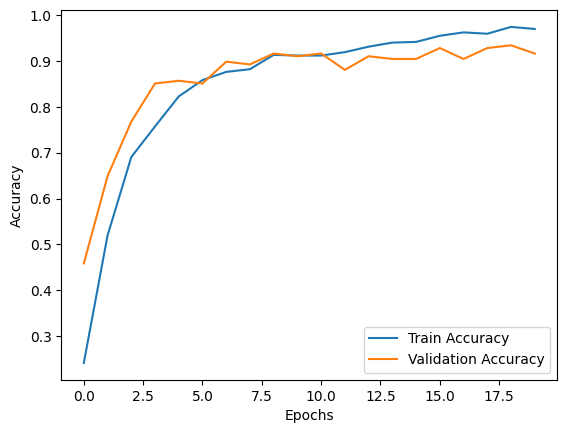

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


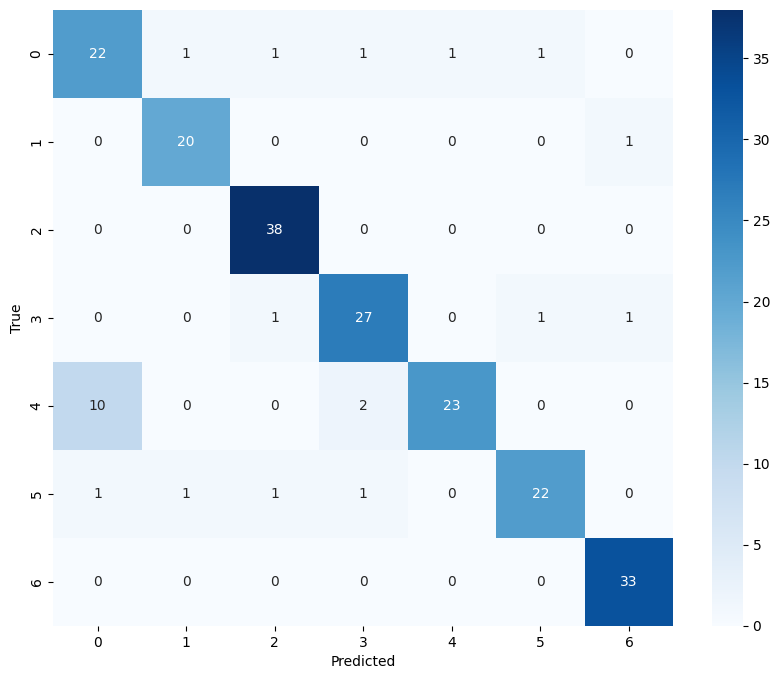

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [13]:
from sklearn.metrics import classification_report
class_names = label_encoder.classes_
print(classification_report(y_test, y_pred_classes, target_names=class_names))


                            precision    recall  f1-score   support

                 Baby Care       0.67      0.81      0.73        27
  Beauty and Personal Care       0.91      0.95      0.93        21
                 Computers       0.93      1.00      0.96        38
Home Decor & Festive Needs       0.87      0.90      0.89        30
           Home Furnishing       0.96      0.66      0.78        35
          Kitchen & Dining       0.92      0.85      0.88        26
                   Watches       0.94      1.00      0.97        33

                  accuracy                           0.88       210
                 macro avg       0.88      0.88      0.88       210
              weighted avg       0.89      0.88      0.88       210

